Loading Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

Loading the election data, which is stored in .dta (Stata) format

In [2]:
elec = pd.read_stata("presvote.dta")
elec

,year,incvote,RDIy,RDIyrgrowth,RDIg_term,RDIg_termmean,termed,no_election,termyear,inc_yrs,...,RDIg_0809,RDIg_1011,RDIg_15,RDIg_1213,RDIg_1415,RDIg_0313,RDIg_0116,term,maxterm,initials2
0,1789.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Wash1
1,1790.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Wash1
2,1791.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Wash1
3,1792.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Wash1
4,1793.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Wash2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2016.0,0.511133,42207.0,1.246872,5.912127,1.478032,1.0,57.0,8,8,...,2.431560,0.619718,0.289532,0.979360,0.061633,7.837435,8.932835,2,2.0,Oba2
228,2017.0,NaN,43234.0,2.404114,NaN,NaN,NaN,NaN,1,1,...,0.979360,0.061633,0.515161,1.360437,1.445920,6.412716,9.463121,1,1.0,DJT
229,2018.0,NaN,44553.0,3.005227,NaN,NaN,NaN,NaN,2,2,...,1.360437,1.445920,0.675277,1.572855,1.436767,5.917117,8.022988,1,1.0,DJT
230,2019.0,NaN,45301.0,1.664962,NaN,NaN,NaN,NaN,3,3,...,1.572855,1.436767,0.382528,1.268610,0.035317,7.374122,7.505433,1,1.0,DJT


The full data contains all years since 1789, but we are only interested in election years with the relevant economic data

In [3]:
elec = elec[elec['incvote']>0]
elec

,year,incvote,RDIy,RDIyrgrowth,RDIg_term,RDIg_termmean,termed,no_election,termyear,inc_yrs,...,RDIg_0809,RDIg_1011,RDIg_15,RDIg_1213,RDIg_1415,RDIg_0313,RDIg_0116,term,maxterm,initials2
39,1828.0,0.438058,NaN,NaN,NaN,NaN,NaN,10.0,4,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,JQA
43,1832.0,0.591728,NaN,NaN,NaN,NaN,NaN,11.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Jack1
47,1836.0,0.508333,NaN,NaN,NaN,NaN,NaN,12.0,8,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Jack2
51,1840.0,0.469457,NaN,NaN,NaN,NaN,NaN,13.0,4,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,MvB
55,1844.0,0.492519,NaN,NaN,NaN,NaN,NaN,14.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,Tyl
59,1848.0,0.473319,NaN,NaN,NaN,NaN,NaN,15.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,Polk
63,1852.0,0.463171,NaN,NaN,NaN,NaN,NaN,16.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,Fill
67,1856.0,0.577669,NaN,NaN,NaN,NaN,NaN,17.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,Prc
71,1860.0,0.544248,NaN,NaN,NaN,NaN,NaN,18.0,4,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,Buch
75,1864.0,0.550305,NaN,NaN,NaN,NaN,NaN,19.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Linc1


In [4]:
elec = elec[elec['year'] > 1936]
elec

,year,incvote,RDIy,RDIyrgrowth,RDIg_term,RDIg_termmean,termed,no_election,termyear,inc_yrs,...,RDIg_0809,RDIg_1011,RDIg_15,RDIg_1213,RDIg_1415,RDIg_0313,RDIg_0116,term,maxterm,initials2
151,1940.0,0.550000,7942.0,5.779559,9.295837,2.323959,NaN,38.0,8,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.0,FDR2
155,1944.0,0.537738,10754.0,1.858336,30.311266,7.577816,NaN,39.0,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4.0,FDR3
159,1948.0,0.523695,10019.0,3.400825,-7.079449,-1.769862,NaN,40.0,4,16,...,NaN,0.757890,1.180511,-0.439696,3.840054,NaN,NaN,1,2.0,Tru1
163,1952.0,0.445481,11026.0,1.710538,9.577283,2.394321,NaN,41.0,8,20,...,-0.159154,2.480001,1.563384,-1.102851,2.437475,8.733908,12.935856,2,2.0,Tru2
167,1956.0,0.577517,12223.0,2.905251,10.306331,2.576583,NaN,42.0,4,4,...,2.608426,3.161414,0.049152,1.268411,0.583188,5.660130,8.206442,1,2.0,Eis1
171,1960.0,0.499174,12629.0,0.547860,3.267633,0.816908,1.0,43.0,8,8,...,1.209887,0.647303,-0.308435,0.832908,-0.268945,2.414572,2.000790,2,2.0,Eis2
175,1964.0,0.613447,14350.0,5.478370,NaN,NaN,NaN,44.0,1,4,...,1.017516,1.301601,0.930304,2.860959,3.273224,9.082898,14.258408,1,2.0,LBJ1
179,1968.0,0.495941,16748.0,3.444113,15.452890,3.863223,NaN,45.0,5,8,...,2.110248,1.214314,0.047659,1.884949,1.451822,10.887163,13.689790,2,2.0,LBJ2
183,1972.0,0.617861,18999.0,3.633840,12.610750,3.152688,NaN,46.0,4,4,...,1.082953,1.371463,1.665203,1.067616,2.465185,8.683988,15.558821,1,2.0,Nix1
187,1976.0,0.489477,20306.0,2.175568,6.653006,1.663252,NaN,47.0,4,8,...,-0.745217,2.521463,0.517077,1.507692,0.873196,1.136149,2.995381,1,1.0,Ford


We can make a scatterplot with  the `scatterplot` function from seaborn (loaded here as sns). The first argument tells what variable  to use for the x axis, the second argumnt is the y  axis, and the third argument is the data frame containing these variables.

<AxesSubplot:xlabel='RDIyrgrowth', ylabel='incvote'>

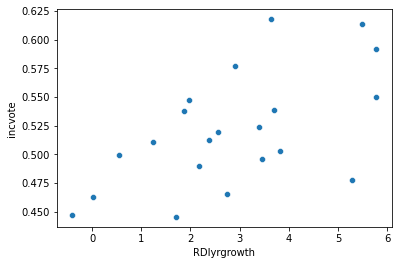

In [5]:
sns.scatterplot(x='RDIyrgrowth', y='incvote', data=elec)

Adding horizontal and vertical lines at the means using the `axvline` and `axhline` functions.

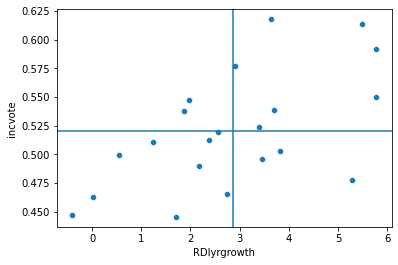

In [6]:
sns.scatterplot(x='RDIyrgrowth', y='incvote', data=elec)
plt.axvline(np.mean(elec['RDIyrgrowth']))
plt.axhline(np.mean(elec['incvote']))

In [7]:
np.corrcoef(elec['RDIyrgrowth'], elec['incvote'])

array([[1.        , 0.58311177],
       [0.58311177, 1.        ]])

An easy way to add a regression line is to use the `regplot` function in seaborn. The `ci=0` option tells it to not plot a confidence interval, which we aren't discussing yet.

<AxesSubplot:xlabel='RDIyrgrowth', ylabel='incvote'>

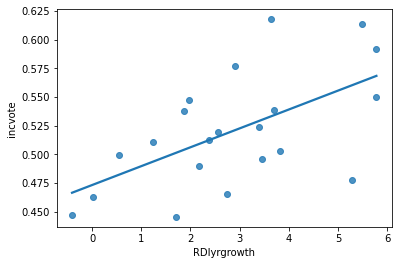

In [57]:
sns.regplot(x='RDIyrgrowth', y='incvote', data=elec, ci=0)

For the next plot we  are going to want to loop through the elections, which will be a bit more straightforward with the following step (don't worry about the details here)

In [58]:
elec = elec.reset_index(drop=True)
elec

,year,incvote,RDIy,RDIyrgrowth,RDIg_term,RDIg_termmean,termed,no_election,termyear,inc_yrs,...,RDIg_0809,RDIg_1011,RDIg_15,RDIg_1213,RDIg_1415,RDIg_0313,RDIg_0116,term,maxterm,initials2
0,1940.0,0.550000,7942.0,5.779559,9.295837,2.323959,NaN,38.0,8,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.0,FDR2
1,1944.0,0.537738,10754.0,1.858336,30.311266,7.577816,NaN,39.0,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4.0,FDR3
2,1948.0,0.523695,10019.0,3.400825,-7.079449,-1.769862,NaN,40.0,4,16,...,NaN,0.757890,1.180511,-0.439696,3.840054,NaN,NaN,1,2.0,Tru1
3,1952.0,0.445481,11026.0,1.710538,9.577283,2.394321,NaN,41.0,8,20,...,-0.159154,2.480001,1.563384,-1.102851,2.437475,8.733908,12.935856,2,2.0,Tru2
4,1956.0,0.577517,12223.0,2.905251,10.306331,2.576583,NaN,42.0,4,4,...,2.608426,3.161414,0.049152,1.268411,0.583188,5.660130,8.206442,1,2.0,Eis1
5,1960.0,0.499174,12629.0,0.547860,3.267633,0.816908,1.0,43.0,8,8,...,1.209887,0.647303,-0.308435,0.832908,-0.268945,2.414572,2.000790,2,2.0,Eis2
6,1964.0,0.613447,14350.0,5.478370,NaN,NaN,NaN,44.0,1,4,...,1.017516,1.301601,0.930304,2.860959,3.273224,9.082898,14.258408,1,2.0,LBJ1
7,1968.0,0.495941,16748.0,3.444113,15.452890,3.863223,NaN,45.0,5,8,...,2.110248,1.214314,0.047659,1.884949,1.451822,10.887163,13.689790,2,2.0,LBJ2
8,1972.0,0.617861,18999.0,3.633840,12.610750,3.152688,NaN,46.0,4,4,...,1.082953,1.371463,1.665203,1.067616,2.465185,8.683988,15.558821,1,2.0,Nix1
9,1976.0,0.489477,20306.0,2.175568,6.653006,1.663252,NaN,47.0,4,8,...,-0.745217,2.521463,0.517077,1.507692,0.873196,1.136149,2.995381,1,1.0,Ford


In [55]:
elec.shape[0]

21

To illustrate the "total sum of squares", we can make the scatter plot, and then loop  through each election and draw a line between the realized incumbent vote share and the average. 

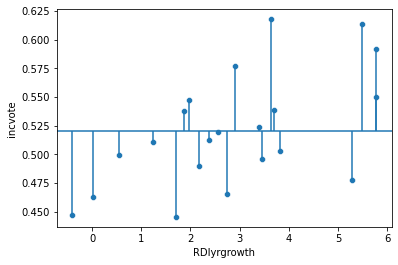

In [59]:
sns.scatterplot(x='RDIyrgrowth', y='incvote', data=elec)
ybar = np.mean(elec['incvote'])
plt.axhline(ybar)
for el in range(0,elec.shape[0]):
    plt.vlines(elec.RDIyrgrowth[el],ybar, elec.incvote[el])

To do the same on the best fit line, we need the regression output:

In [67]:
m1 = smf.ols('incvote~RDIyrgrowth', data=elec).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                incvote   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     9.789
Date:                Thu, 14 Oct 2021   Prob (F-statistic):            0.00553
Time:                        10:23:49   Log-Likelihood:                 37.905
No. Observations:                  21   AIC:                            -71.81
Df Residuals:                      19   BIC:                            -69.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4733      0.018     26.897      0.000       0.436       0.510
RDIyrgrowth     0.0165      0.005      3.129      0.006       0.005       0.027
==============================================================================
Omnibus:                        0.030   Durbin-Watson:                   2.586
Prob(Omnibus):                  0.985   Jarque-Bera (JB):                0.101
Skew:                           0.040   Prob(JB):                        0.951
Kurtosis:                       2.669   Cond. No.                         6.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If you want to do it in one line:

In [68]:
smf.ols('incvote~RDIyrgrowth', data=elec).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                incvote   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     9.789
Date:                Thu, 14 Oct 2021   Prob (F-statistic):            0.00553
Time:                        10:24:10   Log-Likelihood:                 37.905
No. Observations:                  21   AIC:                            -71.81
Df Residuals:                      19   BIC:                            -69.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4733      0.018     26.897      0.000       0.436       0.510
RDIyrgrowth     0.0165      0.005      3.129      0.006       0.005       0.027
==============================================================================
Omnibus:                        0.030   Durbin-Watson:                   2.586
Prob(Omnibus):                  0.985   Jarque-Bera (JB):                0.101
Skew:                           0.040   Prob(JB):                        0.951
Kurtosis:                       2.669   Cond. No.                         6.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To retreive the parameters we can use the `.params` function. 

In [62]:
b0 = m1.params[0]
b1 = m1.params[1]

Now we can draw lines between the points and the regression line.

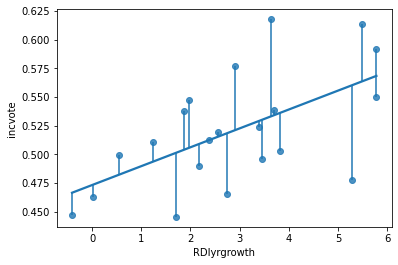

In [63]:
sns.regplot(x='RDIyrgrowth', y='incvote', data=elec, ci=0)
for el in range(0,elec.shape[0]):
    plt.vlines(elec.RDIyrgrowth[el],b0 + b1*elec.RDIyrgrowth[el], elec.incvote[el])

Unfortunately seaborn does not have a good function to label points, but we can use the `scatter` function in the plotly.express library  for this.

In [65]:
import plotly.express as px

In [66]:
fig=px.scatter(elec, x='RDIyrgrowth',y='incvote', text='initials2', trendline='ols')
fig.update_traces(textposition='top center')
fig.show()